<a href="https://colab.research.google.com/github/BigFatTotoro9/BresenhamAlgorithm-Python/blob/main/Bresenham.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

2D Transformation

In [ ]:
import math as m
import numpy as np

def tr(Trx=0,Try=0):
  return np.array([[1, 0, 0],[0, 1, 0],[Trx,Try,1]])

def sc(Sx=1, Sy=1):
  return np.array([[Sx,0,0],[0,Sy,0],[0,0,1]])

def rot(teta):
  return np.array([[m.cos(m.radians(teta)),m.sin(m.radians(teta)),0],
      [-m.sin(m.radians(teta)),m.cos(m.radians(teta)),0],
      [0,0,1]])

Bresenham Algorithm

In [ ]:
def garis(x1, y1, x2, y2, Image):
  dx = x2 - x1
  dy = y2 - y1
  x, y = x1, y1

  # Garis Vertikal
  # Checked
  if (x2 == x1):

    while (y2 > y):
      Image.putpixel((x, y), (0, 0, 0))
      y += 1
      x = x

    while (y2 < y):
      Image.putpixel((x, y), (0, 0, 0))
      y -= 1
      x = x

  else:
    slope = (dy)/(dx)
    # print(slope)

    # Garis horizontal
    # Checked
    if (slope == 0):

      while (x2 > x):
        Image.putpixel((x, y), (0, 0, 0))
        x += 1
        y = y

      while (x2 < x):
        Image.putpixel((x, y), (0, 0, 0))
        x -= 1
        y = y

    # Garis diagonal m positif
    # Checked
    elif (slope == 1):

      while (x2 > x):
        Image.putpixel((x, y), (0, 0, 0))
        x += 1
        y += 1

      while (x2 < x):
        Image.putpixel((x, y), (0, 0, 0))
        x -= 1
        y -= 1

    # Garis diagonal m negatif
    # Checked
    elif (slope == -1):

      while (x2 > x):
        Image.putpixel((x, y), (0, 0, 0))
        x += 1
        y -= 1

      while (x2 < x):
        Image.putpixel((x, y), (0, 0, 0))
        x -= 1
        y += 1

    # Garis Cenderung Mendatar Kuadran 1 bolak balik
    # Slope positif
    # Checked
    elif (slope > 0) and (slope < 1):
      d1, d2 = 2*dy, 2*(dy-dx)
      p = d1 - dx

      while(x < x2):
        if(p>=0):
          p += d2
          y += 1

        else:
          p += d1
          y = y

        Image.putpixel((x,y),(0,0,0))
        x += 1

      while(x > x2):
        if(p<=0):
          p += d2
          y -= 1

        else:
          p += d1
          y = y
        Image.putpixel((x,y),(0,0,0))
        x -= 1

    # Garis Cenderung Tegak Kuadran 1 & 3 bolak balik
    # Slope positif
    # Checked
    elif (slope > 1):
      d1, d2 = 2*dx, 2*(dx-dy)
      p = d1-dy

      while(y < y2):
        if(p>=0):
          p += d2
          x += 1

        else:
          p += d1
          x = x

        Image.putpixel((x,y),(0,0,0))
        y += 1

      while(y > y2):
        if(p<=0):
          p += d2
          x -= 1

        else:
          p += d1
          x = x

        Image.putpixel((x,y),(0,0,0))
        y -= 1

    # Garis Cenderung Mendatar Kuadran 2 & 4 bolak balik
    # Slope negatif
    # Checked
    elif (-1 < slope) and (slope < 0):
      d1, d2 = 2 * dy, 2 * (dy + dx)
      p = d1 + dx

      while (x < x2):
        if (p <= 0):
          p += d2
          y -= 1
        else:
          p += d1
          y = y

        Image.putpixel((x, y), (0, 0, 0))
        x += 1

      while (x > x2):
        if (p >= 0):
          p += d2
          y += 1
        else:
          p += d1
          y = y

        Image.putpixel((x, y), (0, 0, 0))
        x -= 1

    #Garis Cenderung Tegak Kuadran 2 & 4 bolak balik
    # Slope negatif
    # Checked
    elif (slope < -1):
      d1, d2 = 2 * dx, 2 * (dx + dy)
      p = d1 + dy

      while (y < y2):
        if (p <= 0):
          p += d2
          x -= 1
        else:
          p += d1
          x = x

        Image.putpixel((x, y), (0, 0, 0))
        y += 1

      while (y > y2):
        if (p >= 0):
          p += d2
          x += 1
        else:
          p += d1
          x = x

        Image.putpixel((x, y), (0, 0, 0))


Refactor

In [ ]:
def bres(a, b, Image):
  garis(round(a[0]), round(a[1]), round(b[0]), round(b[1]), Image)


Implementation

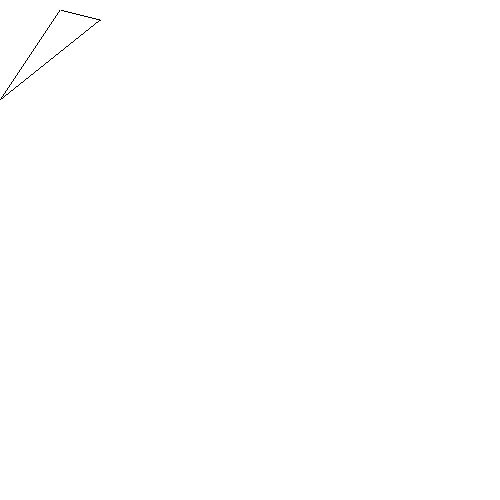

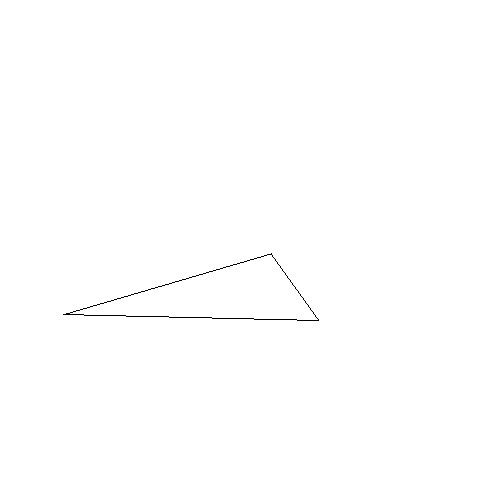

In [ ]:
from PIL import Image

A = [0, 100, 1]
B = [100, 20, 1]
C = [60, 10, 1]

#before transformation
image = Image.new("RGB",(500,500),(255,255,255))
bres(A, B, image)
bres(B, C, image)
bres(C, A, image)

#transformation
M = sc(2,2) @ tr(250) @ rot(40)
A2 = A@M
B2 = B@M
C2 = C@M

#after transformation
imgtransformed = Image.new("RGB", (500,500), (255,255,255))
bres(A2, B2, imgtransformed)
bres(B2, C2, imgtransformed)
bres(C2, A2, imgtransformed)



display(image)
display(imgtransformed)